In [2]:
import scipy.stats as st
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

In [3]:
#1 а
x_sred = 187.9
st_otkl = 32.4
n = 9
X = st.norm(0, 1)
z = X.isf(0.1)

In [4]:
theta_1 = x_sred - (z * st_otkl) / n**(1/2)
theta_2 =  x_sred + (z * st_otkl) / n**(1/2)
print(f' {theta_1}, {theta_2}')

 174.05924309211832, 201.7407569078817


In [5]:
x, otkl, n, pp = sp.symbols('x, otkl, n, pp')

In [6]:
#бэ
eq1 = x - (pp * otkl) / n**(1/2) - 165.8
eq2 = x + (pp * otkl) / n**(1/2) - 210
sol1 = sp.solve(eq2,pp)[0]; sol1
sol1_sub = sol1.subs([(n, 9), (x, 187.9), (otkl, st_otkl)]);



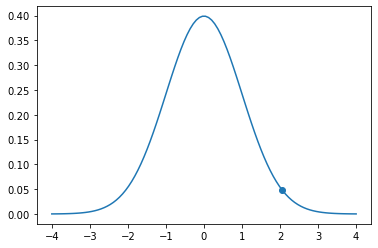

In [7]:

fig, ax1 = plt.subplots()
x = np.linspace(-4, 4, 100)
ax1.plot(x, X.pdf(x))
ax1.scatter(sol1_sub, X.pdf(float(sol1_sub)))

In [8]:
    
print(f'Ответ: {1  - 2 * X.sf(float(sol1_sub))}')

Ответ: 0.9592727721142793


In [248]:
#2

In [ ]:
st.norm(0,1).isf(0.01) 

In [ ]:
(st.norm(0,1).isf(0.01) /0.025)**2

In [ ]:
#3
sigma = (6.35**2 + 7.62**2)**(1/2)

In [ ]:
mean = 165.1 - 177.8

In [ ]:
X = st.norm(loc = mean, scale = sigma)
X.sf(0)

In [ ]:
muzh = st.norm(177.8, 7.62)
zhen = st.norm(165.1, 6.35)
sample1 = muzh.rvs(size = 1000000)
sample2 = zhen.rvs(size = 1000000)
(sample2 > sample1).sum()/1000000

In [ ]:
#9.4
gamma = 0.95
alpha = 1 - gamma
arr = np.array([-2] * 2 + [1] + [2] * 2 + [3] * 2 + [4] * 2 + [5])
arr

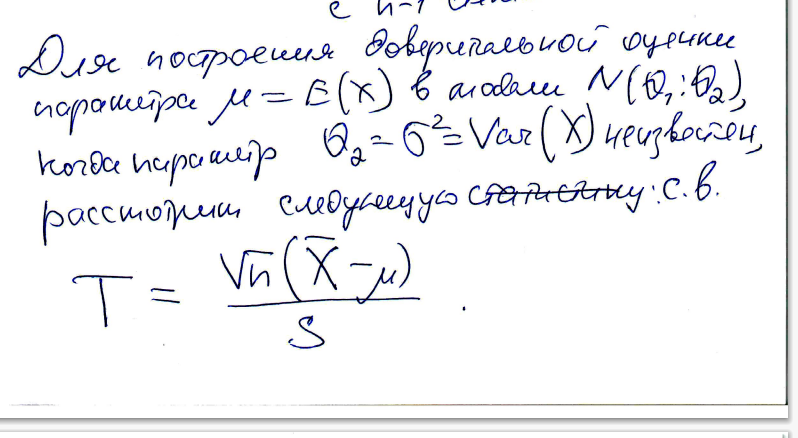

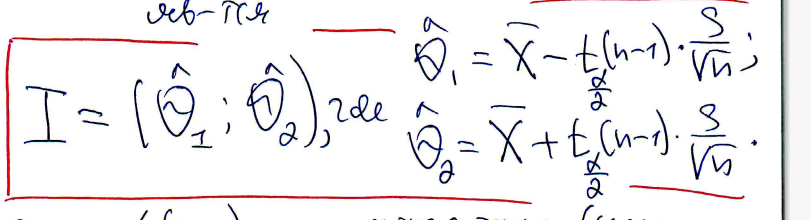

In [11]:
student = st.t(len(arr) - 1)

In [12]:
theta_1 = arr.mean() - (student.isf(alpha/2) * (arr.var(ddof = 1)**(1/2))) * (1 + 1/len(arr)) ** (1/2)
theta_2 = arr.mean() + (student.isf(alpha/2) * (arr.var(ddof = 1)**(1/2))) * (1 + 1/len(arr)) ** (1/2)
theta_1, theta_2

(56.74106042827357, 95.42693957172644)

In [9]:
#5
#5
price_doll = 99
alpha = 0.01
arr = np.array([79.9, 72.68, 71.32, 78.77, 77.75])
upper_border = arr.mean() + st.t(arr.size - 1).isf(alpha/2) * (arr.var(ddof = 1)**(1/2))*(1 + 1/arr.size)**0.5
lower_border = arr.mean() - st.t(arr.size - 1).isf(alpha/2) * (arr.var(ddof = 1)**(1/2))*(1 + 1/arr.size)**0.5
print(lower_border, upper_border, upper_border * price_doll)
ans = upper_border * price_doll
print(f'надо взять {ans}')


56.74106042827357 95.42693957172644 9447.267017600918
надо взять 9447.267017600918


In [ ]:
#6

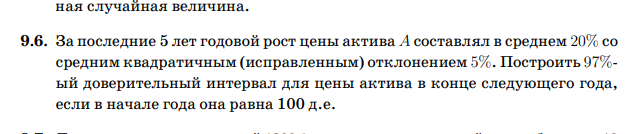

In [8]:
mean = 0.2
st_otkl = 0.05
gamma = 0.97
n = 5
cost = 100
alpha = 1 - gamma
theta_1 = mean - st.t(n - 1).isf(alpha/2) * st_otkl * (1+ 1/n) ** (1/2)
theta_2 = mean + st.t(n - 1).isf(alpha/2) * st_otkl * (1 + 1/n) ** (1/2)
print(cost * (1 + theta_1), cost * (1 + theta_2))

101.93813811734542 138.06186188265457


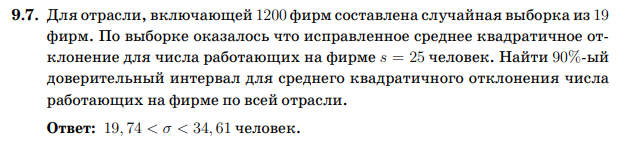

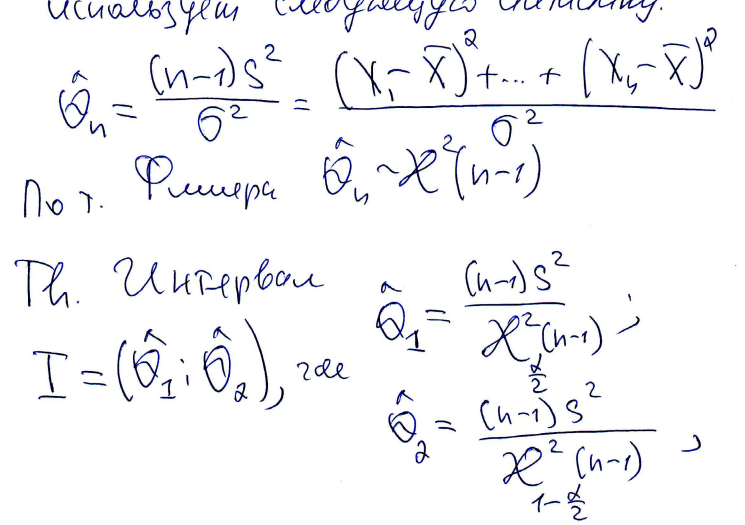

In [14]:
#7
n = 19
s = 25
alpha = 0.1
theta_1 = (n-1) * s**2/st.chi2(n-1).isf(alpha/2)
theta_2 = (n-1) * s**2/st.chi2(n-1).isf(1 - alpha/2)
print(theta_1**(1/2), theta_2**(1/2))

19.740499552627163 34.61249782279546


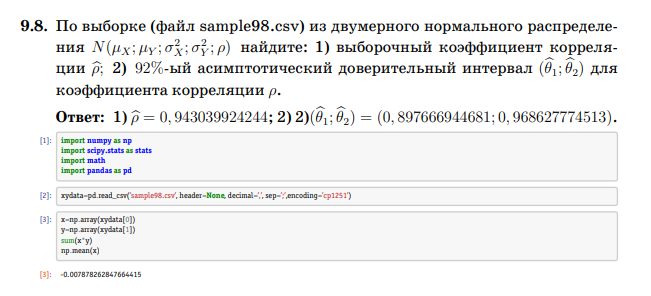

In [20]:
#8
xydata = pd.read_csv('sample98.csv', decimal = ',', header = None, sep = ';', encoding = 'cp1251')

In [35]:
x = np.array(xydata[0])
y = np.array(xydata[1])
alpha = 0.08

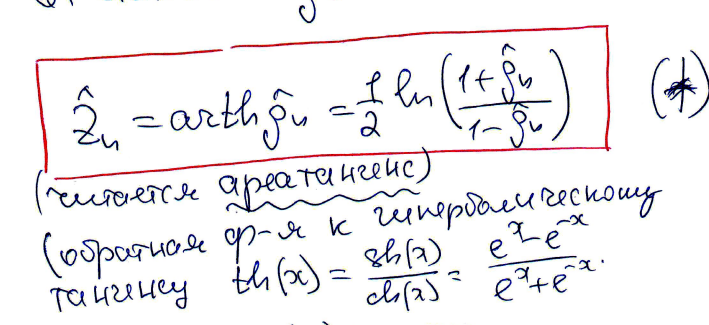|

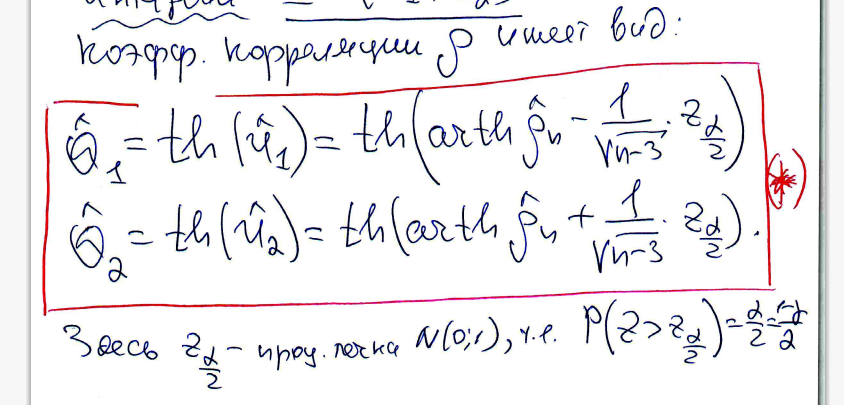

In [36]:
x_mean = x.mean()
y_mean = y.mean()

In [37]:
cor_hat = ((x_mean - x) * (y_mean - y)).sum()/(x.var()**(1/2) * y.var()**(1/2) * x.size); cor_hat

0.9430399242709797

In [39]:
theta_1 = np.tanh(np.arctanh(cor_hat) - (1/(x.size-3) ** (1/2) * st.norm(0, 1).isf(alpha/2)))
theta_2 = np.tanh(np.arctanh(cor_hat) + (1/(x.size-3) ** (1/2) * st.norm(0, 1).isf(alpha/2)))
print(theta_1, theta_2)

0.8976669447274583 0.9686277745278847


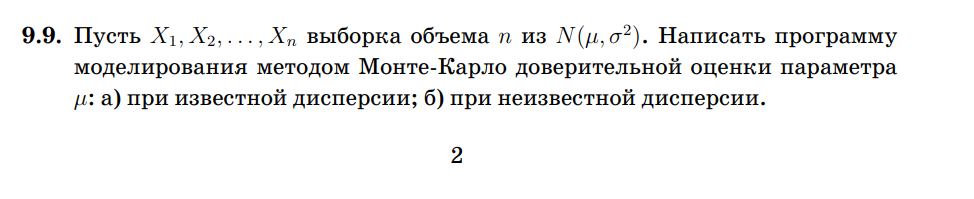

In [58]:
#A
data = st.norm(loc = 5, scale = 0.2).rvs(size = 100000)

In [59]:
sample_size = 1000
sample = np.random.choice(data, size = sample_size)
sample_mean = sample.mean()
alpha = 0.12
pp = st.norm(0, 1).isf(alpha/2)
std = data.std()
delta = pp * std / sample_size**(1/2)
confidence_interval = (sample_mean - delta, sample_mean + delta)
print(confidence_interval)

(5.000160745500007, 5.019865915513788)


In [60]:
intervals = []
sample_means = []
b = []
t = []
c = []
n = 50
for i in range(n):
    sample = np.random.choice(a = data, size = sample_size)
    sample_mean = sample.mean()
    pp = st.norm(0, 1).isf(alpha/2)
    delta = pp * std / sample_size**(1/2)
    confidence_interval = (sample_mean - delta, sample_mean + delta)
    sample_means.append(sample_mean)
    intervals.append(confidence_interval)
for bot, top in intervals:
    b.append(bot)
    t.append(top)
    c.append((bot - top)/2)
    

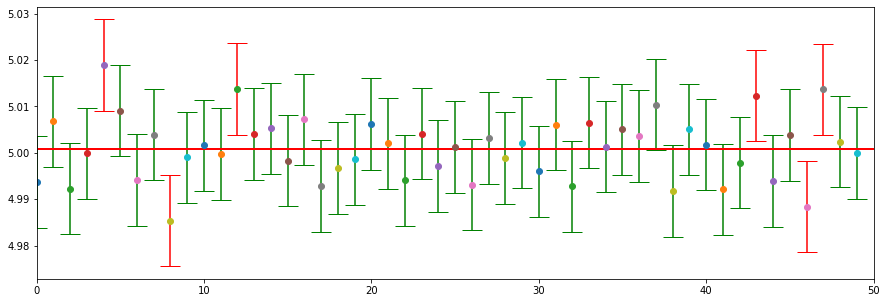

In [61]:
fig,ax =plt.subplots(figsize=(15, 5))
plt.xlim(0,50)
k=0
m=0
for i in range(len(intervals)):
    if b[i] < np.mean(data)<t[i]:
        plt.errorbar(x=i, y=sample_means[i], yerr=c[i],fmt='-o',ecolor='g',capsize=10.0)
        m=m+1
    else:
        plt.errorbar(x=i, y=sample_means[i], yerr=c[i],fmt='-o',ecolor='r',capsize=10)
        k=k+1
plt.hlines(xmin=0, xmax=n, y=np.mean(data), linewidth=2.0,color="red")

In [90]:
#Б
data = st.norm(loc = 5, scale = 0.2).rvs(size = 100000)
sample_size = 1000
sample = np.random.choice(data, size = sample_size)
sample_mean = sample.mean()
alpha = 0.12
pp = st.t(sample_size - 1).isf(alpha/2)

delta = pp * (sample.var(ddof = 1))**(1/2) / sample_size**(1/2)
confidence_interval = (sample_mean - delta, sample_mean + delta)
print(confidence_interval)

(5.000213029213372, 5.019890909794862)


In [91]:
intervals = []
sample_means = []
b = []
t = []
c = []
n = 50
for i in range(n):
    sample = np.random.choice(a = data, size = sample_size)
    sample_mean = sample.mean()
    pp = st.t(sample_size - 1).isf(alpha/2)
    delta = pp * (sample.var(ddof = 1))**(1/2) / sample_size**(1/2)
    confidence_interval = (sample_mean - delta, sample_mean + delta)
    sample_means.append(sample_mean)
    intervals.append(confidence_interval)
for bot, top in intervals:
    b.append(bot)
    t.append(top)
    c.append((bot - top)/2)

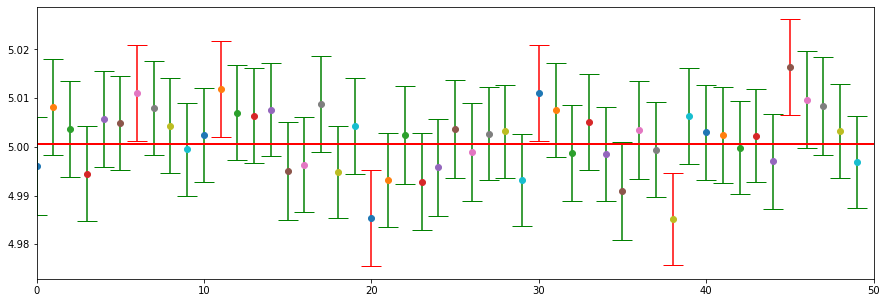

In [92]:
fig,ax =plt.subplots(figsize=(15, 5))
plt.xlim(0,50)
k=0
m=0
for i in range(len(intervals)):
    if b[i] < np.mean(data)<t[i]:
        plt.errorbar(x=i, y=sample_means[i], yerr=c[i],fmt='-o',ecolor='g',capsize=10.0)
        m=m+1
    else:
        plt.errorbar(x=i, y=sample_means[i], yerr=c[i],fmt='-o',ecolor='r',capsize=10)
        k=k+1
plt.hlines(xmin=0, xmax=n, y=np.mean(data), linewidth=2.0,color="red")

#10
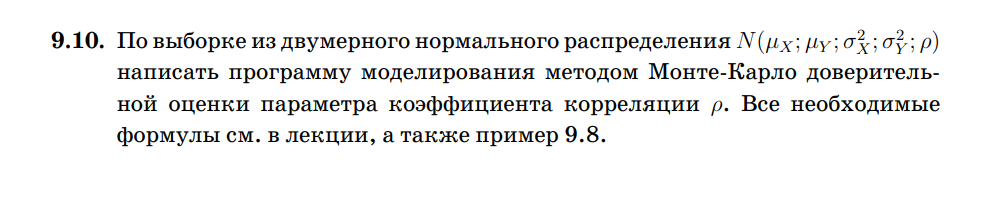

In [238]:
cov = np.array([[1, 1/2], [1/2, 1]])
mean = np.array([2, 3])
X = st.multivariate_normal(cov = cov, mean = mean)
data = X.rvs(size = 100000)
sample_size = 1000
data = list(data)
s1 = pd.Series(data = data)
s1 = s1.apply(lambda x: [*x])
df1 = pd.DataFrame(s1)
df1[1] = df1[0].apply(lambda x: x[1])
df1[0] = df1[0].apply(lambda x: x[0])
data = df1.values
data_x = df1.values[:, 0]
data_y = df1.values[:, 1]
alpha = 0.1
data_cor = ((data_x.mean() - data_x) * (data_y.mean() - data_y)).sum()/(data_x.var()**(1/2) * data_y.var()**(1/2) * data_x.size)
data_cor

0.5005033931090798

In [239]:
intervals = []
sample_cors = []
b = []
t = []
c = []
n = 50
for i in range(n):
    pp = st.norm(0, 1).isf(alpha/2)
    sample = s1.sample(n = sample_size, replace = False)
    df = pd.DataFrame(sample)
    df[1] = df[0].apply(lambda x: x[1])
    df[0] = df[0].apply(lambda x: x[0])
    sample_x = df.values[:, 0]
    sample_y = df.values[:, 1]
    delta = 1/((sample_x.size-3) ** (1/2)) * st.norm(0, 1).isf(alpha/2)
    cor_hat = ((sample_x.mean() - sample_x) * (sample_y.mean() - sample_y)).sum()/(sample_x.var()**(1/2) * sample_y.var()**(1/2) * sample_x.size)
    confidence_interval = (np.tanh(np.arctanh(cor_hat) - delta), np.tanh(np.arctanh(cor_hat) + delta))                        
    sample_cors.append(cor_hat)
    intervals.append(confidence_interval)
for bot, top in intervals:
    b.append(bot)
    t.append(top)
    c.append((bot - top)/2)


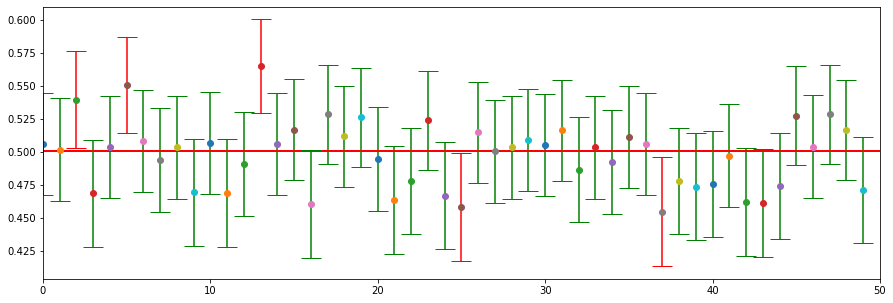

In [240]:
fig,ax =plt.subplots(figsize=(15, 5))
plt.xlim(0,50)
k=0
m=0
for i in range(len(intervals)):
    if b[i] < data_cor<t[i]:
        plt.errorbar(x=i, y=sample_cors[i], yerr=c[i],fmt='-o',ecolor='g',capsize=10.0)
        m=m+1
    else:
        plt.errorbar(x=i, y=sample_cors[i], yerr=c[i],fmt='-o',ecolor='r',capsize=10)
        k=k+1
plt.hlines(xmin=0, xmax=n, y=data_cor, linewidth=2.0,color="red")